# Simple linear regression - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import seaborn as sns
# sns.set()

## Load the data

In [3]:
data = pd.read_csv('real_estate_price_size.csv')

In [4]:
data.head(10)

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
5,245050.280,575.19
6,265129.064,570.89
7,175716.480,620.82
8,331101.344,682.26
9,218630.608,694.52


In [5]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [10]:
y = data['price']

x1 = data['size']

sGtMean = data['size'].map(lambda x: x>data['size'].mean())
print(sGtMean.head())
# normalize

y -= y.mean(axis=0)
y /= y.std(axis=0)

x1 -= x1.mean(axis=0)
x1 /= x1.std(axis=0)


0    False
1    False
2    False
3     True
4     True
Name: size, dtype: bool


### Explore the data

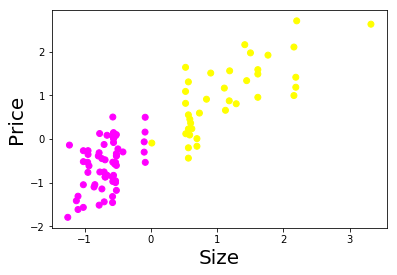

In [20]:
plt.scatter(x1,y, c = sGtMean, cmap=plt.cm.spring)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Regression itself

In [71]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()
results.summary()
#results.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           8.13e-31
Time:                        15:46:10   Log-Likelihood:                -73.118
No. Observations:                 100   AIC:                             150.2
Df Residuals:                      98   BIC:                             155.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.163e-16      0.051    8.2e-15      1.000      -0.101       0.101
size           0.8630      0.051     16.909      0.000       0.762       0.964
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

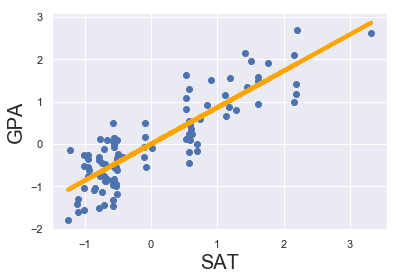

In [70]:
plt.scatter(x1,y)
yhat = x1*results.params[1]+results.params[0]
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()